# Improving Efficiency and Time Complexity Analysis: Sort Example

In this example we leverage our understanding of computational complexity to assess and improve efficiency of existing code. The result is reduced time complexity and overall runtime.

Time Complexity is shown in the comments and Step Count functions are derived for each algorithm.

In [1]:
from itertools import chain
import time
import random
import matplotlib.pyplot as plt
import heapq as hq


In [2]:
def bubbleSortInefficient(myArray):
    '''
    Performs bubble sort (poorly ...)
    
    Arguments
    ---------
    myArray: list
       list to be sorted
    
    Returns
    --------
    none: sorts in-place      
    
    Note: Computational Step Count Estimates (worst case) shown in comments
    '''
  
    
    n = len(myArray)    # c1: constant number of steps
    for dummy in range(n):  # c2*n: a linear number of steps 
        for i in range(n-1): # c4*n(n-1): a quadratic number of steps
            if myArray[i+1] < myArray[i]: # c5*n(n-1)
                temp = myArray[i]  # c6*n(n-1) ... worst case
                myArray[i] = myArray[i+1]  # c7*n(n-1)  ... worst case
                myArray[i+1] = temp  # c8*n(n-1)  ... worst case
            # else do nothing

# Over all computational step count T(n) for insertions sort with list of size n:
    # T(n) = c1 + c2*n + (c4 + c5 + c6 + c7 + c8)(n(n-1))
    #      = c1 + c9*n + c10(n(n-1))                 


In [3]:
def bubbleSort(myArray):
    '''
    Performs bubble sort
    
    Arguments
    ---------
    myArray: list
       list to be sorted
    
    Returns
    --------
    none: sorts in-place      
    
    Note: Computational Step Count Estimates (worst case) shown in comments
    '''
    
    
    n = len(myArray)    # c1: constant number of steps
    while n > 0:  # c2*n: a linear number of steps 
        #sortedArray = list(myArray)
        alreadySorted = True  # c3 * n
        for i in range(n-1): # c4*(1+2+3+...+n): a quadratic number of steps
            if myArray[i+1] < myArray[i]: # c5*n(n-1)/2
                temp = myArray[i]  # c6*n(n-1)/2
                myArray[i] = myArray[i+1]  # c7*n(n-1)/2
                myArray[i+1] = temp #c8*n(n-1)/2
                alreadySorted = False #c9*n(n-1)/2
        if alreadySorted: # assume part of c4
            break  # 0 .... assume worst case
        n = n-1  # assume part of c2
           



    # Over all computational step count T(n) for insertions sort with list of size n:
        # T(n) = c1 + c2*n+ c3*n + (c4 + c5 + c6 + c7 + c8 + c9)(n(n-1)/2)
        #      = c1 + c10*n + c11*(n(n-1)/2)
        

Observe the original (inefficient) version of the sorting algorithm has almost twice the number of computational steps. Recognizing that after each outer iteration, one new item is placed in the correct order allows us to reduce the number of iterations in the inner loop by one after each iteration.

###Main: Run trials and record the runtimes of each sorting algorithm

Text(0, 0.5, 'Time')

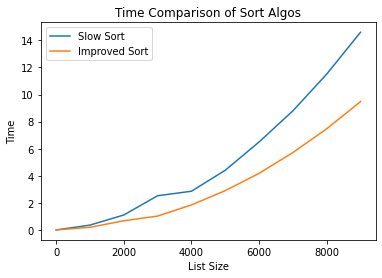

In [4]:
## record the time results
slowSort = []
improvedSort  = []


size = 10000
stepSize = 1000
## calculate the time required to sort various size lists
for i in range(0, size, stepSize):
    ## generate the random list
    rList = random.sample(range(0, size), i)
    rListCopy = rList.copy()
    
    
    ## do the inefficient insertion sort
    start = time.perf_counter()
    bubbleSortInefficient(rListCopy)
    slowSort.append(time.perf_counter() - start)
    
    ## do the insertion sort
    start = time.perf_counter()
    bubbleSort(rList)
    improvedSort.append(time.perf_counter() - start)

    

## plot the results
plt.plot(range(0, size, stepSize), slowSort, label = 'Slow Sort')
plt.plot(range(0, size, stepSize), improvedSort, label = 'Improved Sort')
#plt.plot(range(0, size, stepSize), defaultTime, label = 'Default')
plt.legend(frameon = 'none')
plt.title('Time Comparison of Sort Algos')
plt.xlabel('List Size')
plt.ylabel('Time')
